In [71]:
!pip install matplotlib

                                              0.0/8.0 MB ? eta -:--:--
                                              0.2/8.0 MB 4.6 MB/s eta 0:00:02
     -                                        0.4/8.0 MB 4.6 MB/s eta 0:00:02
     ---                                      0.7/8.0 MB 5.4 MB/s eta 0:00:02
     ----                                     1.0/8.0 MB 5.6 MB/s eta 0:00:02
     ------                                   1.4/8.0 MB 6.2 MB/s eta 0:00:02
     --------                                 1.6/8.0 MB 6.3 MB/s eta 0:00:02
     ---------                                2.0/8.0 MB 6.3 MB/s eta 0:00:01
     -----------                              2.3/8.0 MB 6.2 MB/s eta 0:00:01
     ------------                             2.4/8.0 MB 5.9 MB/s eta 0:00:01
     -------------                            2.7/8.0 MB 6.0 MB/s eta 0:00:01
     --------------                           2.9/8.0 MB 5.8 MB/s eta 0:00:01
     ----------------                         3.3/8.0 MB 6.0 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
!pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     ------------------                     143.4/294.9 kB 4.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
!pip install scikit-learn

                                              0.0/11.0 MB ? eta -:--:--
                                              0.1/11.0 MB 3.6 MB/s eta 0:00:03
                                              0.3/11.0 MB 3.2 MB/s eta 0:00:04
     -                                        0.4/11.0 MB 3.2 MB/s eta 0:00:04
     --                                       0.6/11.0 MB 3.3 MB/s eta 0:00:04
     --                                       0.7/11.0 MB 3.4 MB/s eta 0:00:04
     ---                                      0.9/11.0 MB 3.4 MB/s eta 0:00:03
     ----                                     1.1/11.0 MB 3.6 MB/s eta 0:00:03
     ----                                     1.3/11.0 MB 3.5 MB/s eta 0:00:03
     -----                                    1.4/11.0 MB 3.6 MB/s eta 0:00:03
     -----                                    1.6/11.0 MB 3.5 MB/s eta 0:00:03
     ------                                   1.8/11.0 MB 3.5 MB/s eta 0:00:03
     -------                                  1.9/11.0 MB 3


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [544]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [545]:
df1 = pd.read_csv('Table1.csv')
df2 = pd.read_csv('Table2.csv')
df3 = pd.read_csv('Table3.csv')

In [546]:
df = pd.concat([df1, df2, df3], axis=1)

df = df1.merge(df2, on='Sno').merge(df3, on='Sno')

# Print the merged dataframe
print(df)

       Sno  BHK        Property Type  beds  bathroom  Balcony  \
0        5  NaN       Co-op property   NaN       NaN      NaN   
1        6  NaN           Ranch/Farm   2.0       NaN      NaN   
2        7  NaN                  NaN   NaN       NaN      NaN   
3        8  NaN      Villa/Townhouse   5.0       7.0      NaN   
4        9  NaN      Villa/Townhouse   4.0       5.0      NaN   
...    ...  ...                  ...   ...       ...      ...   
3343  3462  NaN  Residence/Apartment   3.0       2.0      NaN   
3344  3463  NaN                  NaN   NaN       NaN      NaN   
3345  3464  NaN           Ranch/Farm   3.0       NaN      NaN   
3346  3465  NaN           Ranch/Farm   NaN       NaN      NaN   
3347  3466  NaN                  NaN   NaN       NaN      NaN   

                                                Address    City State code  \
0     Sale: building as new, store and 6 apartments,...   Porto   4150-695   
1     Property with garden, lake and pool, for sale,...   Porto

In [547]:
df.shape

(3348, 23)

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno                    3348 non-null   int64  
 1   BHK                    0 non-null      float64
 2   Property Type          2994 non-null   object 
 3   beds                   2598 non-null   float64
 4   bathroom               2231 non-null   float64
 5   Balcony                0 non-null      float64
 6   Address                3348 non-null   object 
 7   City                   3348 non-null   object 
 8   State code             2792 non-null   object 
 9   Country                3348 non-null   object 
 10  Landmark               0 non-null      float64
 11  carpetarea             3348 non-null   int64  
 12  status                 3348 non-null   object 
 13  floor                  0 non-null      float64
 14  transaction type       0 non-null      float64
 15  Year

### Deleting totally Null columns as those features data cannot be scrapped 

In [549]:
del df['BHK']
del df['Balcony']
del df['floor']
del df['transaction type']
del df['Landmark']

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno                    3348 non-null   int64  
 1   Property Type          2994 non-null   object 
 2   beds                   2598 non-null   float64
 3   bathroom               2231 non-null   float64
 4   Address                3348 non-null   object 
 5   City                   3348 non-null   object 
 6   State code             2792 non-null   object 
 7   Country                3348 non-null   object 
 8   carpetarea             3348 non-null   int64  
 9   status                 3348 non-null   object 
 10  Year Built             3348 non-null   int64  
 11  price per square feet  3348 non-null   int64  
 12  furnished status       3348 non-null   object 
 13  facing                 3348 non-null   object 
 14  Car Parking            3348 non-null   bool   
 15  Type

### Dealing with Null values

In [551]:
df.isna().sum()

Sno                         0
Property Type             354
beds                      750
bathroom                 1117
Address                     0
City                        0
State code                556
Country                     0
carpetarea                  0
status                      0
Year Built                  0
price per square feet       0
furnished status            0
facing                      0
Car Parking                 0
Type of ownership           0
booking amount              0
buy total price             0
dtype: int64

### For beds and Bathroom we can impute the values with average values of respective column or can even go with mode of columns

In [552]:
print("average beds value : ", int(df['beds'].mean()))
print("Mode value of beds : ", int(df['beds'].mode()[0]))

average beds value :  4
Mode value of beds :  4


In [553]:
print("average bathroom value : ", int(df['bathroom'].mean()))
print("Median value of bathroom : ", int(df['bathroom'].median()))
print("Mode value of bathroom : ", int(df['bathroom'].mode()[0]))

average bathroom value :  4
Median value of bathroom :  4
Mode value of bathroom :  3


In [554]:
df['beds'] = df['beds'].fillna(int(df['beds'].mean()))

df['bathroom'] = df['bathroom'].fillna(df['bathroom'].median())

### For propertyType and stateCode we can impute values in 2 ways : 
### 1. we can use forward fill or backward fill method, as on a websites properties are listed related to statecode which means different statecode properties are basically shown together ( I will be choosing this option with backward fill)
### 2. else we can impute the propertype with unknown and same with statecode (not preferable as the amount of null values are significant)

In [555]:
df['Property Type'] = df['Property Type'].fillna(method='bfill')

In [556]:
df['State code'].value_counts()

State code
,           547
Algarve     277
81611       165
59937       105
06840        63
           ... 
M4W1P6        1
M5R3N8        1
M4T1E2        1
4405-917      1
4150-695      1
Name: count, Length: 604, dtype: int64

In [557]:
df.isna().sum()

Sno                        0
Property Type              1
beds                       0
bathroom                   0
Address                    0
City                       0
State code               556
Country                    0
carpetarea                 0
status                     0
Year Built                 0
price per square feet      0
furnished status           0
facing                     0
Car Parking                0
Type of ownership          0
booking amount             0
buy total price            0
dtype: int64

### As we can see it has arounf 547 values as ',' and 556 null values it is better get rid of this column as we cannot impute values of state code based on any statistical method 

In [558]:
del df['State code']

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno                    3348 non-null   int64  
 1   Property Type          3347 non-null   object 
 2   beds                   3348 non-null   float64
 3   bathroom               3348 non-null   float64
 4   Address                3348 non-null   object 
 5   City                   3348 non-null   object 
 6   Country                3348 non-null   object 
 7   carpetarea             3348 non-null   int64  
 8   status                 3348 non-null   object 
 9   Year Built             3348 non-null   int64  
 10  price per square feet  3348 non-null   int64  
 11  furnished status       3348 non-null   object 
 12  facing                 3348 non-null   object 
 13  Car Parking            3348 non-null   bool   
 14  Type of ownership      3348 non-null   object 
 15  book

In [560]:
df.isna().sum()

Sno                      0
Property Type            1
beds                     0
bathroom                 0
Address                  0
City                     0
Country                  0
carpetarea               0
status                   0
Year Built               0
price per square feet    0
furnished status         0
facing                   0
Car Parking              0
Type of ownership        0
booking amount           0
buy total price          0
dtype: int64

In [561]:
df = df.dropna(subset=['Property Type'])

In [562]:
df.isna().sum()

Sno                      0
Property Type            0
beds                     0
bathroom                 0
Address                  0
City                     0
Country                  0
carpetarea               0
status                   0
Year Built               0
price per square feet    0
furnished status         0
facing                   0
Car Parking              0
Type of ownership        0
booking amount           0
buy total price          0
dtype: int64

In [563]:
df.shape

(3347, 17)

In [564]:
# Removing any records which might have total price = 0 
df = df[df['buy total price'] > 0]

In [565]:
# Removing any records which might have carpetarea = 0 
df = df[df['carpetarea'] > 0]

In [566]:
df['Property Type'].value_counts()

Property Type
Single Family                    1140
Villa/Townhouse                   326
Residence/Apartment               317
Condominium                       210
Ranch/Farm                         36
Other                              22
Co-op property                     13
Multi Family                        6
Fractional Ownership Property       3
Land/Lot                            2
Private Island                      1
Commercial / Office                 1
Name: count, dtype: int64

In [567]:
df = df[df['Property Type'] != 'Other']

### Replacing 'year Build value' for less then 25% values with mean value of column so as to have a balanced distribution in 'Year Build' column

In [568]:
percentile_25 = np.percentile(df['Year Built'], 25)

# Calculate the average of the entire 'year' column
average_year = df['Year Built'].mean()

# Replace values in 'year' less than the 25th percentile with the average year value
df.loc[df['Year Built'] < percentile_25, 'Year Built'] = average_year

In [569]:
percentile_25 = np.percentile(df['price per square feet'], 25)

# Calculate the average of the entire 'year' column
average_year = df['price per square feet'].mean()

# Replace values in 'year' less than the 25th percentile with the average year value
df.loc[df['price per square feet'] < percentile_25, 'price per square feet'] = average_year

In [570]:
percentile_80 = np.percentile(df['carpetarea'], 80)

# Calculate the average of the entire 'year' column
average_year = df['carpetarea'].mean()

# Replace values in 'year' less than the 25th percentile with the average year value
df.loc[df['carpetarea'] > percentile_80, 'carpetarea'] = average_year

### we have propertyType as 'Other' also, which might not be usefull for creating a model based PropertyType its better to remove them

In [571]:
df.shape

(2055, 17)

In [572]:
df.describe()

,Sno,beds,bathroom,carpetarea,Year Built,price per square feet,booking amount,buy total price
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2.055000e+03,2.055000e+03,2.055000e+03
mean,1784.649148,4.300243,4.159124,34264.990388,1876.425623,5.522658e+05,1.151644e+07,2.880343e+08
std,928.954232,1.802809,2.295477,48012.632089,207.884286,1.686579e+07,1.218805e+07,3.029080e+08
min,9.000000,2.000000,2.000000,1.000000,1519.792701,3.532600e+04,4.533360e+05,9.974400e+06
25%,1071.500000,3.000000,3.000000,3600.000000,1880.000000,5.311400e+04,4.753550e+06,1.193744e+08
50%,1750.000000,4.000000,4.000000,5500.000000,1995.000000,8.295400e+04,7.265104e+06,1.827809e+08
75%,2422.500000,5.000000,5.000000,101733.176642,2017.000000,4.470521e+05,1.323142e+07,3.283240e+08
max,3465.000000,26.000000,52.000000,172224.000000,2026.000000,7.647040e+08,9.617690e+07,2.122213e+09


### From above we can observe that beds and bathroom have some kind of outliers , and along with them we will also check for carpetarea

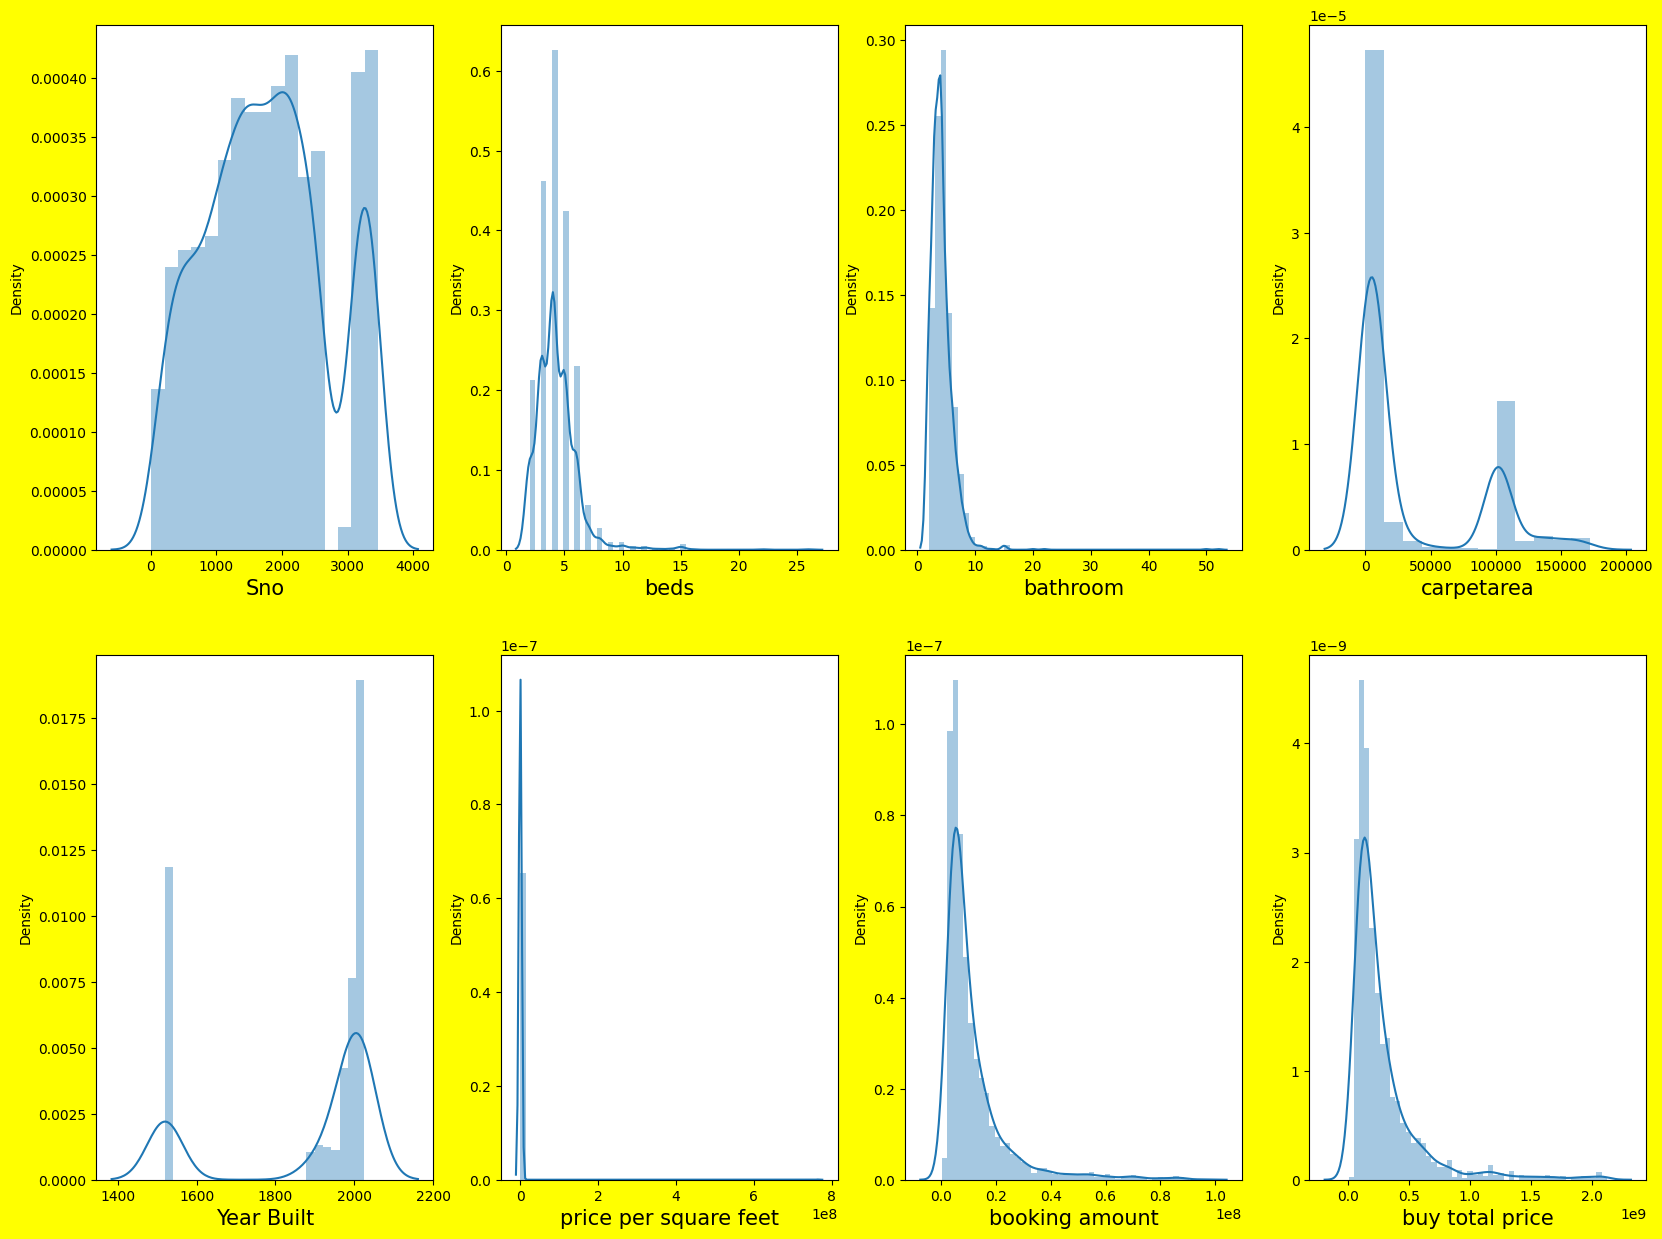

In [573]:
# Distribution plot
numeric_columns = df.select_dtypes(include=[np.number]).columns

col_num = 1
plt.figure(figsize=(20,15), facecolor = 'yellow')

for col in numeric_columns:
    if col_num <= 8:
        ax = plt.subplot(2,4, col_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=15)
        
    col_num +=1
        
plt.show()

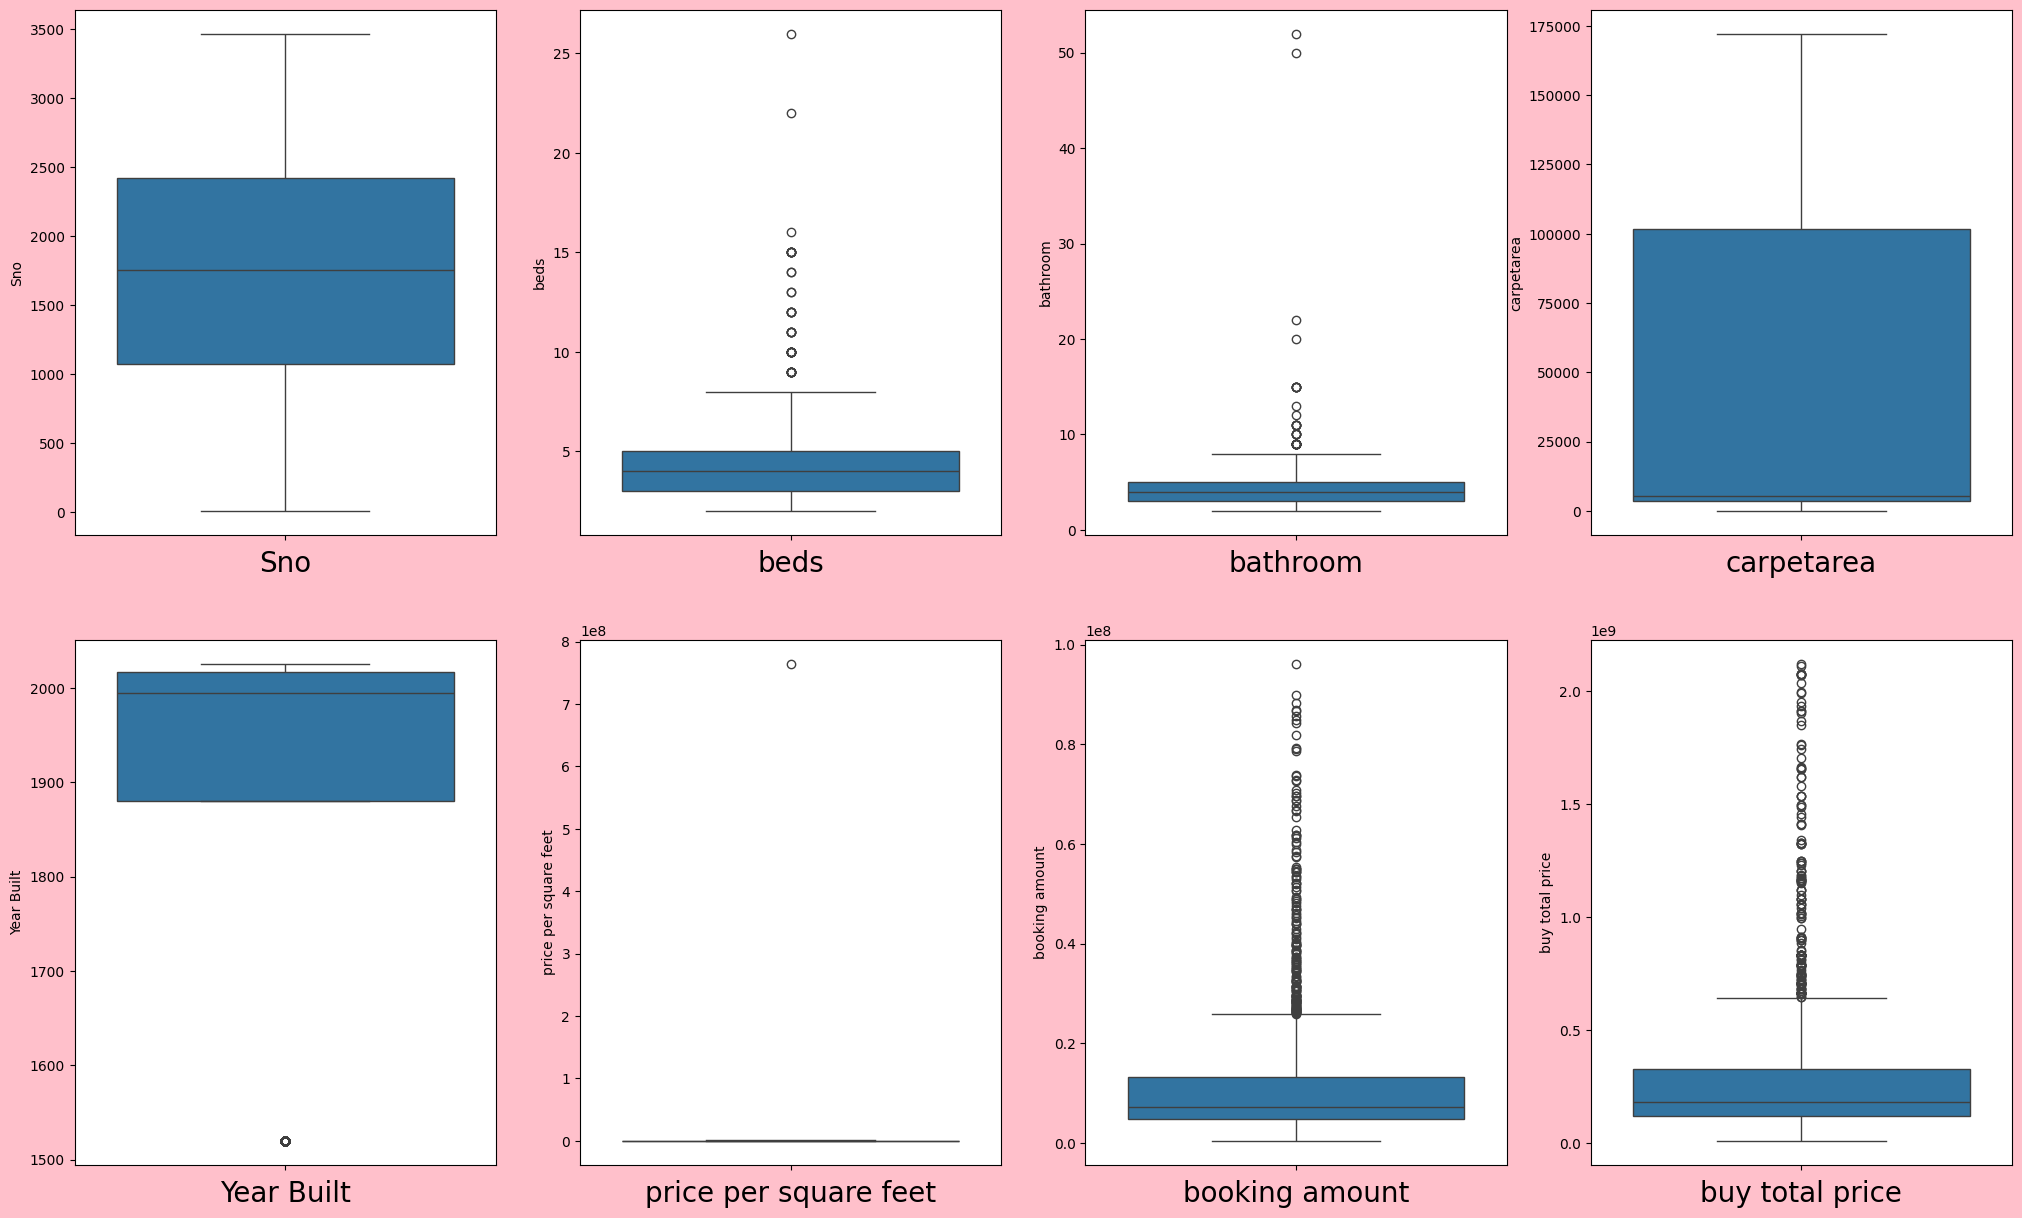

In [574]:
col_num = 1
plt.figure(figsize=(25,15), facecolor='pink')

for col in numeric_columns:
    if col_num <= 8:
        ax = plt.subplot(2,4,col_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=20)        
    col_num += 1
    
plt.show()

### As we can observe from distribution and box plot that except sno and yearBuild all the 6 columns have some sort of outliers, now understand these outliers could be real world values but since because of these few outliers value our future model can produce skewed results hence we have to remove them 

### 1. we can apply Inter quartile method for removing outliers in beds and bathroom

In [575]:
q1 = df['beds'].quantile(0.25)
q3 = df['beds'].quantile(0.75)
iqr = q3-q1
iqr

2.0

In [576]:
beds_high = (q3 + (1.5 * iqr))
beds_index = np.where(df['beds'] > beds_high)
df = df.drop(df.index[beds_index])
df.reset_index()
df.shape

(2012, 17)

In [577]:
q1 = df['bathroom'].quantile(0.25)
q3 = df['bathroom'].quantile(0.75)
iqr = q3-q1
iqr

2.0

In [578]:
bathroom_high = (q3 + (1.5 * iqr))
bathroom_index = np.where(df['beds'] > bathroom_high)
df = df.drop(df.index[bathroom_index])
df.reset_index()
df.shape

(2012, 17)

### 2. we can apply percentile method to deal with outliers of carpetarea, price per square feet, booking amount and buy total price

In [579]:
q1 = df['price per square feet'].quantile(0.25)
q3 = df['price per square feet'].quantile(0.75)
iqr = q3-q1
iqr

388087.25

In [580]:
percentile_02 = df['carpetarea'].quantile(0.02)
percentile_96 = df['carpetarea'].quantile(0.96)

# Filter out rows where the 'carpetarea' column is greater than the 98th percentile
df = df[df['carpetarea'] >= percentile_02]
df = df[df['carpetarea'] <= percentile_96]

In [581]:
percentile_02 = df['price per square feet'].quantile(0.02)
percentile_99 = df['price per square feet'].quantile(0.99)

# Filter out rows where the 'carpetarea' column is greater than the 98th percentile
df = df[df['price per square feet'] >= percentile_02]
df = df[df['price per square feet'] <= percentile_99]

In [582]:
percentile_98 = df['booking amount'].quantile(0.98)

# Filter out rows where the 'carpetarea' column is greater than the 98th percentile
df = df[df['booking amount'] <= percentile_98]

In [583]:
percentile_98 = df['buy total price'].quantile(0.98)

# Filter out rows where the 'carpetarea' column is greater than the 98th percentile
df = df[df['buy total price'] <= percentile_98]

### Now we have to deal with price per square feet and carpetarea column

In [584]:
q1 = df['price per square feet'].quantile(0.25)
q3 = df['price per square feet'].quantile(0.75)
iqr = q3-q1
iqr

394021.0866180049

In [585]:
ppsf_low = (q1 - (1.5 * iqr))
ppsf_index = np.where(df['price per square feet'] < ppsf_low)
df = df.drop(df.index[ppsf_index])
df.reset_index()
df.shape

(1774, 17)

In [586]:
ppsf_high = (q3 + (1.5 * iqr))
ppsf_index = np.where(df['price per square feet'] > ppsf_high)
df = df.drop(df.index[ppsf_index])
df.reset_index()
df.shape

(1774, 17)

In [587]:
q1 = df['carpetarea'].quantile(0.25)
q3 = df['carpetarea'].quantile(0.75)
iqr = q3-q1
iqr

69113.0

In [588]:
carpet_low = (q1 - (1.5 * iqr))
carpet_index = np.where(df['carpetarea'] < carpet_low)
df = df.drop(df.index[carpet_index])
df.reset_index()
df.shape

(1774, 17)

In [589]:
carpet_high = (q3 + (1.1 * iqr))
carpet_index = np.where(df['carpetarea'] > carpet_high)
df = df.drop(df.index[carpet_index])
df.reset_index()
df.shape

(1774, 17)

In [590]:
q1 = df['buy total price'].quantile(0.25)
q3 = df['buy total price'].quantile(0.75)
iqr = q3-q1
iqr

186577884.0

In [591]:
btp_high = (q3 + iqr)
btp_index = np.where(df['buy total price'] > btp_high)
df = df.drop(df.index[btp_index])
df.reset_index()
df.shape

(1593, 17)

### plotting distribution and boxplot after treating outliers

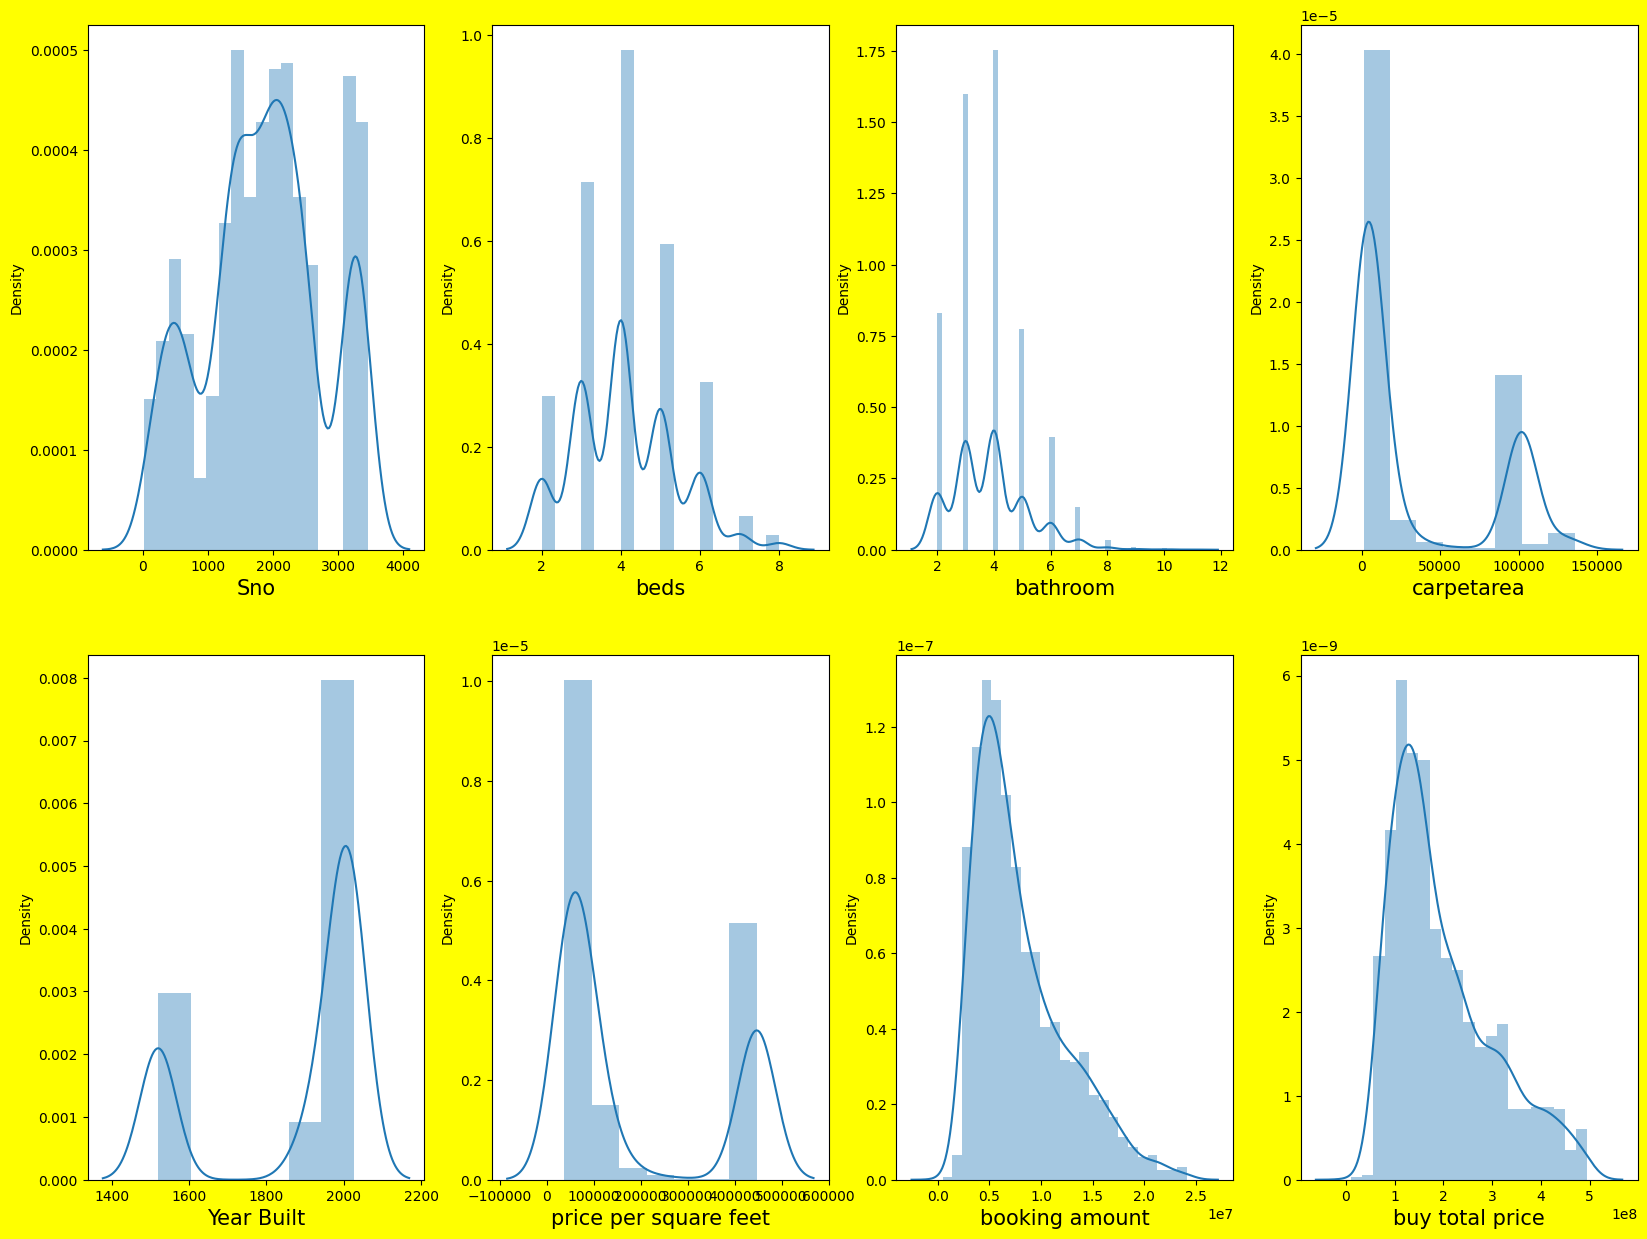

In [592]:
# Distribution plot
numeric_columns = df.select_dtypes(include=[np.number]).columns

col_num = 1
plt.figure(figsize=(20,15), facecolor = 'yellow')

for col in numeric_columns:
    if col_num <= 8:
        ax = plt.subplot(2,4, col_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=15)
        
    col_num +=1
        
plt.show()

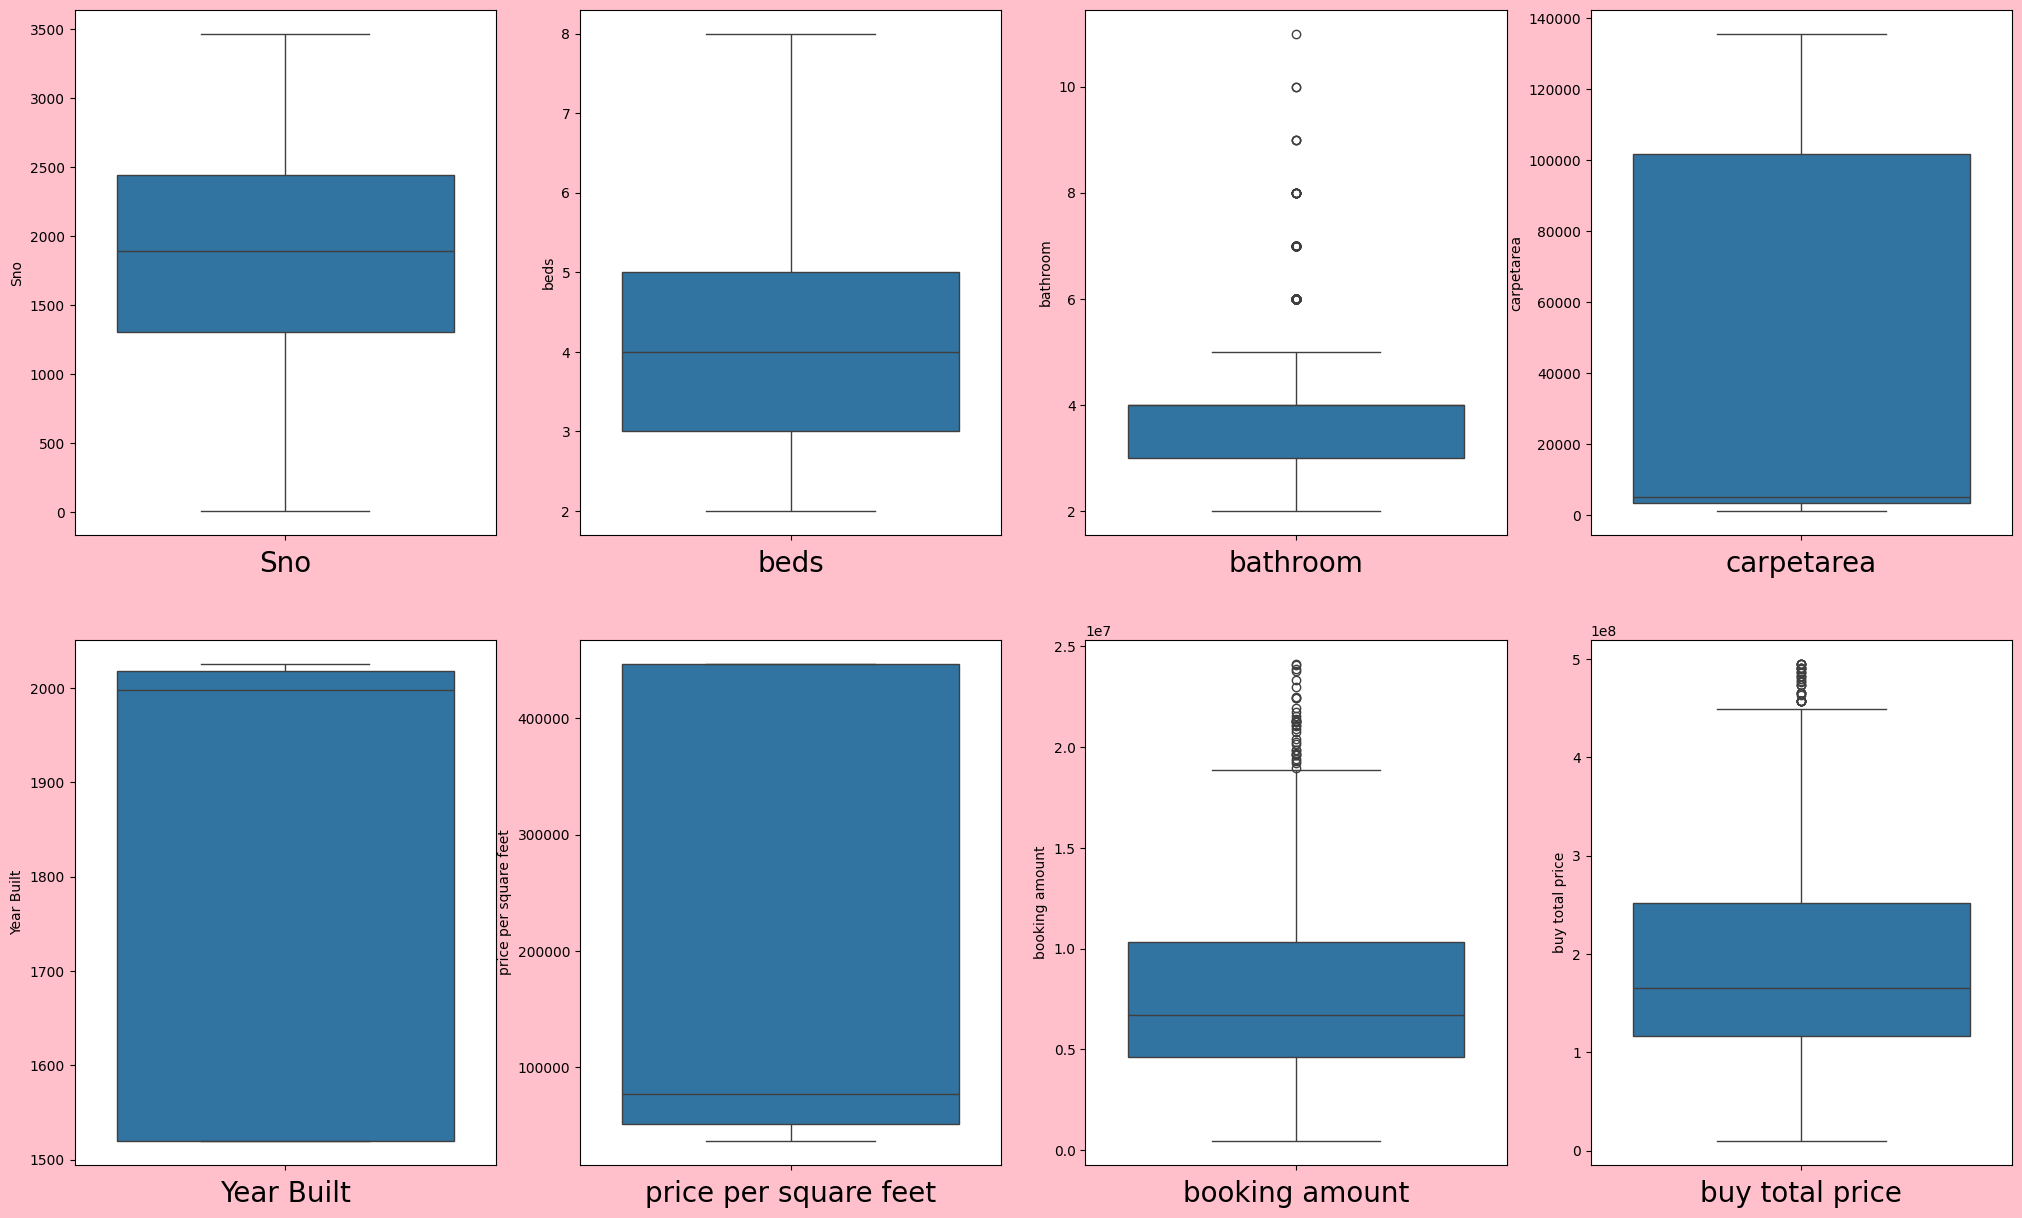

In [593]:
col_num = 1
plt.figure(figsize=(25,15), facecolor='pink')

for col in numeric_columns:
    if col_num <= 8:
        ax = plt.subplot(2,4,col_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=20)        
    col_num += 1
    
plt.show()

In [594]:
df.describe()

,Sno,beds,bathroom,carpetarea,Year Built,price per square feet,booking amount,buy total price
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1.593000e+03,1.593000e+03
mean,1857.538606,4.081607,3.822348,32570.608843,1876.388128,183779.667137,7.943451e+06,1.974221e+08
std,910.906466,1.269915,1.320672,44161.556576,208.348494,176082.805322,4.399514e+06,1.040407e+08
min,9.000000,2.000000,2.000000,1226.000000,1519.792701,36573.000000,4.533360e+05,9.974400e+06
25%,1302.000000,3.000000,3.000000,3500.000000,1519.792701,51119.000000,4.607092e+06,1.163680e+08
50%,1892.000000,4.000000,4.000000,5224.000000,1998.000000,77052.000000,6.724491e+06,1.658244e+08
75%,2439.000000,5.000000,4.000000,101733.176642,2018.000000,447052.086618,1.034038e+07,2.520128e+08
max,3465.000000,8.000000,11.000000,135626.000000,2026.000000,447052.086618,2.414852e+07,4.951830e+08


In [595]:
df.shape

(1593, 17)

In [ ]:
df.to_csv('cleaned_data.csv',index=False)